## Bias-Variance Trade-off

Whenever we train any type of machine learning algorithm we are making some choices about a model to use, and fitting the parameters of that model. The more degrees of freedom the algorithm has, the more complicated the model that can be fitted. More complicated models have inherent dangers such as overfitting, and requiring more training data. There is another way to understand this idea that more complex models do not necessarily result in better results. This is known as the Bias-Variance Trade-off.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Plot the data points and the fitted regression curve
import operator

def plot_polyfit_lines(x, y, y_poly_pred_list, label_list=None):
    i = 0
    colors = ['r', 'g', 'y', 'b', 'm', 'k', 'c']
    for y_poly_pred in y_poly_pred_list:
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
        x1, y_poly_pred = zip(*sorted_zip)
       
        plt.scatter(x, y, s=10)
        if label_list is None:
            plt.plot(x1, y_poly_pred, color=colors[i])
        else:
            plt.plot(x1, y_poly_pred, label = label_list[i], color=colors[i])
        i += 1
    plt.legend(loc=4)
    plt.show()

In [3]:
# Let's build a dataset to play with
np.random.seed(0)
tX = 2 - 3 * np.random.normal(0, 1, 20)
ty = tX - 2 * (tX ** 2) + 0.5 * (tX ** 3) + np.random.normal(-3, 3, 20)

# First need to reshape x to be a column vector
X = tX[:, np.newaxis]
y = ty

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


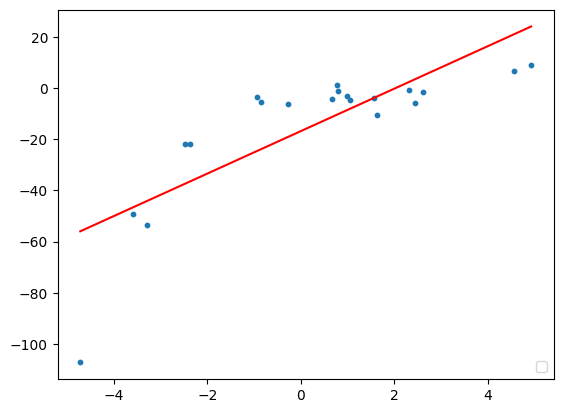

In [4]:
# Now lets do a linear regression
from sklearn.linear_model import LinearRegression

m1 = LinearRegression()
m1.fit(X, y)
y_pred1 = m1.predict(X)

plot_polyfit_lines(X, y, [y_pred1])

In [5]:
# Compute the R^2 score and the RMSE
from sklearn.metrics import mean_squared_error, r2_score

rmse1 = np.sqrt(mean_squared_error(y, y_pred1))
r21 = r2_score(y, y_pred1)

print("RMSE: ", rmse1)
print("R2: ", r21)

RMSE:  15.908242501429998
R2:  0.6386750054827146


### Now let's try some higher order polynomials to see if we can fit the curve in the data

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

# Create polynomial features of a given degree and then do linear regression
def qpolyfit(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    # print (x)
    # print (x_poly)
       
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    return model, rmse, r2, x_poly, y_poly_pred

#### Try fitting the data with a quadratic polynomial - Order 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


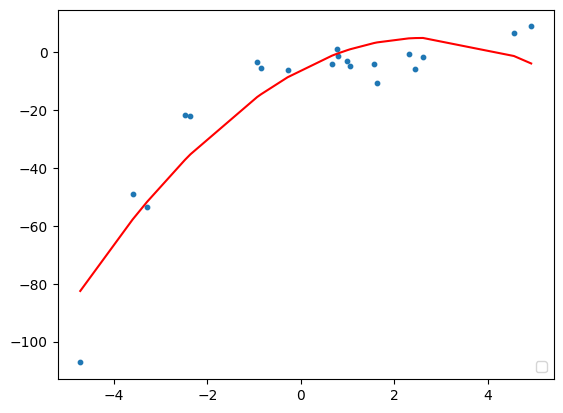

RMSE:  10.120437473614711
R2:  0.8537647164420812


In [7]:
m2, rmse2, r22, x_poly2, y_poly_pred2 = qpolyfit(X, y, 2)
plot_polyfit_lines(X, y, [y_poly_pred2])
print("RMSE: ", rmse2)
print("R2: ", r22)

### Now let's try some higher order polynomials

Order 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


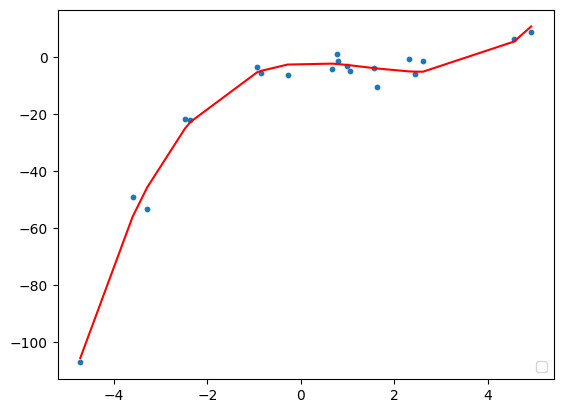

RMSE:  3.449895507408725
R2:  0.9830071790386679


In [8]:
m3, rmse3, r23, x_poly3, y_poly_pred3 = qpolyfit(X, y, 3)
plot_polyfit_lines(X, y, [y_poly_pred3])
print("RMSE: ", rmse3)
print("R2: ", r23)

Order 10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


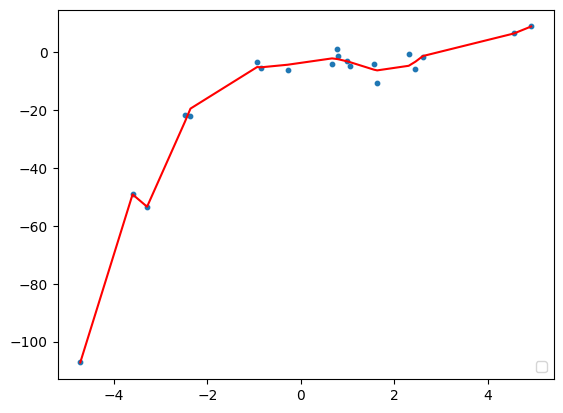

RMSE:  2.0243974275604715
R2:  0.9941487971704481


In [9]:
m10, rmse10, r210, x_poly10, y_poly_pred10 = qpolyfit(X, y, 10)
plot_polyfit_lines(X, y, [y_poly_pred10])
print("RMSE: ", rmse10)
print("R2: ", r210)

Order 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


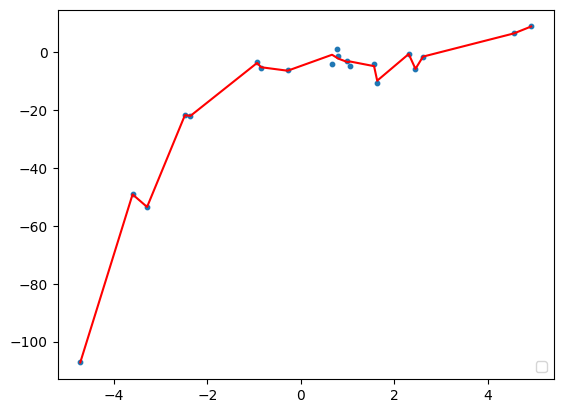

RMSE:  1.113149282818872
R2:  0.9982308672542438


In [10]:
m20, rmse20, r220, x_poly20, y_poly_pred20 = qpolyfit(X, y, 20)
plot_polyfit_lines(X, y, [y_poly_pred20])
print("RMSE: ", rmse20)
print("R2: ", r220)

### Plot them all together

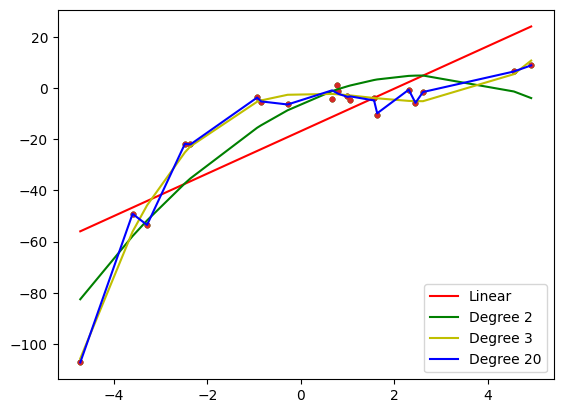

In [11]:
plot_polyfit_lines(X, y, [y_pred1, y_poly_pred2, y_poly_pred3, y_poly_pred20], ['Linear', 'Degree 2', 'Degree 3', 'Degree 20'])

Notice that the error values (RMSE) go down as we increase the order and the goodness of fit (R-squared - R2) increases. However, our curve gets increasingly specific to the training data. This is called over-fitting. Whereas the linear model under-fits the data. 

### Bias and Variance

A model can be bad for two different reasons. Either it is not accurate and doesn’t match the data well, or it is not very precise and there is a lot of variation in the results. The first of these is known as the bias, while the second is the statistical variance.

Bias (not the bias input for a Perceptron) is the error due to a model's simplistic assumptions in fitting the data. High bias means that the model is unable to capture the patterns in the data. This results in underfitting the data.

Variance refers to the error due to an overly complex model trying to fit the data. High variance means the model passes through more of the data points but results in over-fitting the data.

One way to estimate Bias and Variance is to use Sum Squared Error (SSE) as an approximation of Bias and use the following formula for variance:

<img src = "VarianceCalc.jpg">

In [12]:
def calc_bias_variance(y, y_pred):
    bias = metrics.mean_squared_error(y, y_pred)*len(y)
    variance = np.mean(y_pred**2) - np.mean(y_pred)**2
    return bias, variance

The linear model is too simplistic for this data and thus has high bias and low variance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


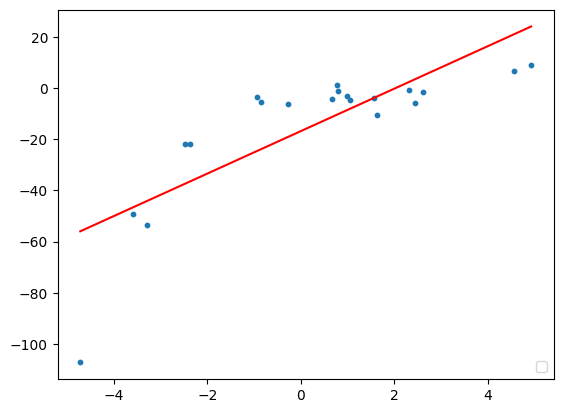

RMSE:  15.908242501429998
R2:  0.6386750054827146
Bias:  5061.443589686075
Variance:  447.3282448550011


In [13]:
plot_polyfit_lines(X, y, [y_pred1])
print("RMSE: ", rmse1)
print("R2: ", r21)
bias1, variance1 = calc_bias_variance(y, y_pred1)
print("Bias: ", bias1)
print("Variance: ", variance1)


The 20 degree polynomial regression has low bias but high variance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


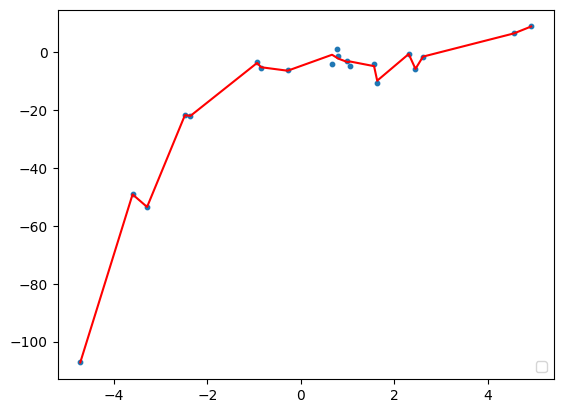

RMSE:  1.113149282818872
R2:  0.9982308672542438
Bias:  24.78202651680338
Variance:  699.0483850724745


In [14]:
plot_polyfit_lines(X, y, [y_poly_pred20])
print("RMSE: ", rmse20)
print("R2: ", r220)
bias20, variance20 = calc_bias_variance(y, y_poly_pred20)
print("Bias: ", bias20)
print("Variance: ", variance20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


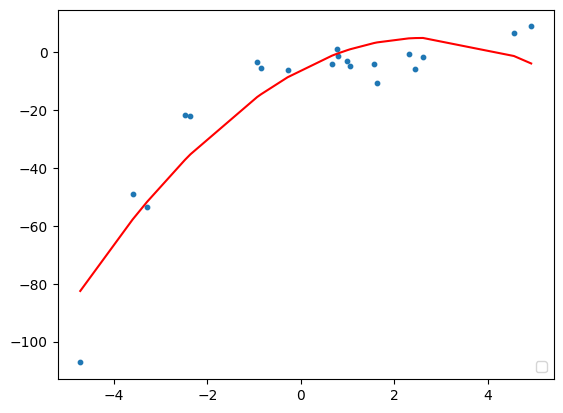

RMSE:  10.120437473614711
R2:  0.8537647164420812
Bias:  2048.4650931468987
Variance:  597.9771696819612


In [15]:
plot_polyfit_lines(X, y, [y_poly_pred2])
print("RMSE: ", rmse2)
print("R2: ", r22)
bias2, variance2 = calc_bias_variance(y, y_poly_pred2)
print("Bias: ", bias2)
print("Variance: ", variance2)

The 3rd degree polynomial regression is a more appropriate balance between bias and variance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


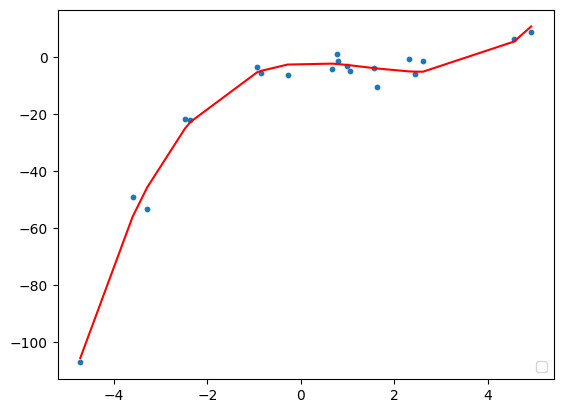

RMSE:  3.449895507408725
R2:  0.9830071790386679
Bias:  238.03558024077807
Variance:  688.4986453272666


In [16]:
plot_polyfit_lines(X, y, [y_poly_pred3])
print("RMSE: ", rmse3)
print("R2: ", r23)
bias3, variance3 = calc_bias_variance(y, y_poly_pred3)
print("Bias: ", bias3)
print("Variance: ", variance3)

### Let's plot these bias and variance values

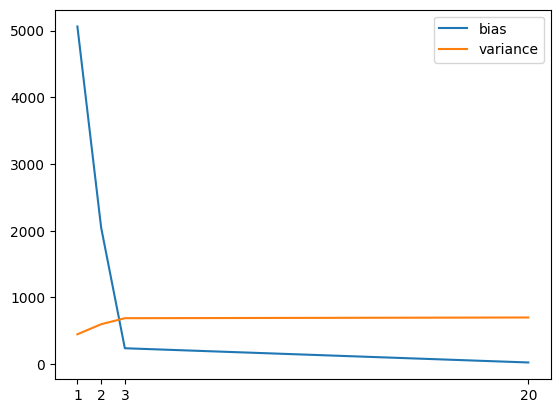

In [17]:
# Now plot the variance and bias as lines
plt.plot([1, 2, 3, 20], [bias1, bias2, bias3, bias20], label='bias')
plt.plot([1, 2, 3, 20], [variance1, variance2, variance3, variance20], label='variance')
plt.xticks([1, 2, 3, 20])
plt.legend()
plt.show()



Typically, as model complexity increases, bias decreases and variance increases. Ideally a model should have low variance and low bias but often a balance must be struck. This is what we refer to as the bias-variance trade-off.

<img src = "BiasVarianceTradeOff.jpg">

### Ways to manage Bias and Variance

First, do not focus solely on minimizing the bias (increasing the accuracy on your training set). Do not forget about the variance. Both are equally important for a robust model.

Bias can be reduced by increasing the complexity of your model through techniques such as adding more features or doing feature engineering.

Variance can be reduced by constraining the complexity of your model.

### Regularization

Regularization is used to constrain (or regularize) the coefficients of our model. It's goal is to protect the model from overfitting. We introduce regularization to our loss function which is used in adjusting our model weights. There are three forms of regularization: L1 (Lasso), L2 (Ridge), and combined (ElasticNet). Each has a parameter, lambda, that is used to scale the regularization.

$$Lasso = SSE + \lambda \sum_{j=1}^{k} |{w_j}|$$

$$Ridge = SSE + \lambda \sum_{j=1}^{k} {w_j^2}$$

$$ElasticNet = SSE + \lambda \sum_{j=1}^{k} (|{w_j}| + {w_j^2})$$

Regularization increases our error and thus more dramatically changes the weights. 
Common values for lambda are 0, .01, .03, etc.

SKlearn provides regularized models

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+02, tolerance: 1.401e+00
  model = cd_fast.enet_coordinate_descent(
c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+02, tolerance: 1.401e+00
  model = cd_fast.enet_coordinate_descent(


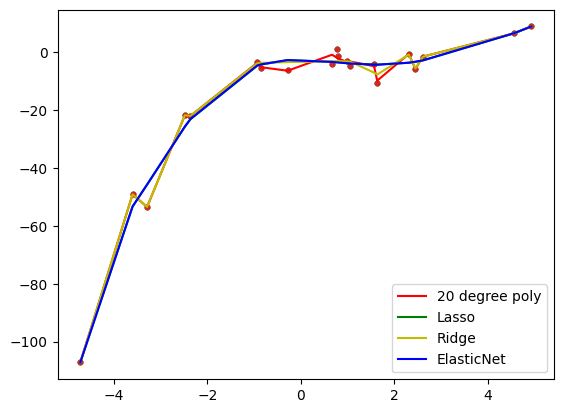

In [18]:
# Let's do Lasso regression on our 20 degree polynomial
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=1000, alpha=0.1)
lasso.fit(x_poly20, y)
y_pred_lasso = lasso.predict(x_poly20)

# Now let's do Ridge regression on our 20 degree polynomial
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=20, solver='svd')
ridge.fit(x_poly20, y)
y_pred_ridge = ridge.predict(x_poly20)


# How about ElasticNet?
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(max_iter=1000, alpha=0.1, l1_ratio=0.5)
elastic.fit(x_poly20, y)
y_pred_elastic = elastic.predict(x_poly20)


plot_polyfit_lines(X, y, [y_poly_pred20, y_pred_lasso, y_pred_ridge, y_pred_elastic], ['20 degree poly', 'Lasso', 'Ridge', 'ElasticNet'])

Note how Lasso regularization drives many of the coefficients of the 20 degree polynomial to 0 making it look like the 3rd degree version.
In this case, Ridge regularization is more effected by some of the large weights. The squared weight value is harder to minimize when a weight is large.
ElasticNet ends up just looking exaclty like Lasso.

L1 (Lasso) drives many weights all the way to 0 (sparse representation and feature reduction)

L1 (Lasso) more robust to large weights (outliers), while L2 (Ridge) acts more dramatically with large weights

L1 (Lasso) leads to simpler models, but L2 (Ridge) is often more accurate with more complex problems which require a bit more complexity 

ElasticNet can sometimes provide a good balance